# Overview

This notebook is used to experiment with various modeling techniques.

# Setup

In [1]:
# Import libraries
import json
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load data
with open('../data/processed/dtypes.json') as in_file:
    non_date_dtypes = json.load(in_file)

with open('../data/processed/date_types.json') as in_file:
    date_dtypes = json.load(in_file)

date_cols = list(date_dtypes)
print(non_date_dtypes)
print(date_cols)

{'Random_ID': 'int64', 'DaysSinceLastRegistration': 'int64', 'DaysSinceFirstRegistration': 'int64', 'PastRegistrations': 'int64', 'DaysSinceLast2UnitsRBCRegistration': 'float64', 'DaysSinceLastPlasmaApheresisRegistration': 'float64', 'DaysSinceLastPlateletApheresisRegistration': 'float64', 'DaysSinceLastPlateletsandConcurrentPlasmaRegistration': 'float64', 'DaysSinceLastRBCwithPlasmaRegistration': 'float64', 'DaysSinceLastRBCwithPlateletsRegistration': 'float64', 'DaysSinceLastRBCwithPlateletsandPlasmaRegistration': 'float64', 'DaysSinceLastSingleUnitRecoveryRegistration': 'float64', 'DaysSinceLastWholeBloodRegistration': 'float64', 'DaysEligible': 'int64', 'PercentOfTargetPeriodEligible': 'float64', 'LastDonationLocation_Center': 'int64', 'LastDonationType_2UnitsRBC': 'uint8', 'LastDonationType_PlasmaApheresis': 'uint8', 'LastDonationType_PlateletApheresis': 'uint8', 'LastDonationType_PlateletsandConcurrentPlasma': 'uint8', 'LastDonationType_RBCwithPlasma': 'uint8', 'LastDonationType_

In [3]:
# Read data, specifically parsing date columns as dates
data = pd.read_csv('../data/processed/data.csv', dtype=non_date_dtypes, parse_dates=date_cols)

In [4]:
data.head()

,Random_ID,DaysSinceLastRegistration,DaysSinceFirstRegistration,PastRegistrations,DaysSinceLast2UnitsRBCRegistration,DaysSinceLastPlasmaApheresisRegistration,DaysSinceLastPlateletApheresisRegistration,DaysSinceLastPlateletsandConcurrentPlasmaRegistration,DaysSinceLastRBCwithPlasmaRegistration,DaysSinceLastRBCwithPlateletsRegistration,...,TargetPlateletApheresisRegistrations,TargetPlateletsandConcurrentPlasmaRegistrations,TargetRBCwithPlasmaRegistrations,TargetRBCwithPlateletsRegistrations,TargetRBCwithPlateletsandPlasmaRegistrations,TargetSingleUnitRecoveryRegistrations,TargetWholeBloodRegistrations,RegisteredInTargetPeriod,DonationsPerDay,CutoffDate
0,54260,32,32,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.031250,2016-03-31 23:59:59
1,54261,308,308,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.003247,2016-03-31 23:59:59
2,54273,165,165,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.006061,2016-03-31 23:59:59
3,54330,100,301,2,301.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.006645,2016-03-31 23:59:59
4,54354,200,200,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.005000,2016-03-31 23:59:59


# Train model using basic RFT features

In [5]:
# Construct feature set (remove date/time columns)
# feature_names =list(data.columns).remove(['Random_ID', 'CutoffDate', 'TargetPeriodEndDate'])
feature_names = ['DaysSinceLastRegistration', 'PastRegistrations', 'DaysSinceFirstRegistration']

X = data.loc[:, feature_names]
y = data.loc[:, 'RegisteredInTargetPeriod']

In [6]:
# Split data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)
print(f"Training feature set size: {X_train.shape}")
print(f"Training response set size: {y_train.shape}")
print(f"Test feature set size: {X_test.shape}")
print(f"Test response set size: {y_test.shape}")

Training feature set size: (529859, 3)
Training response set size: (529859,)
Test feature set size: (132465, 3)
Test response set size: (132465,)


In [7]:
# Train model on training data
clf_logreg = LogisticRegression(penalty='none', random_state=503).fit(X_train, y_train)

In [8]:
# Test on test data
clf_logreg.score(X_test, y_test)

0.9036047257766202

# Train model using more features

In [9]:
# Construct feature set (remove date/time columns)
# feature_names =list(data.columns).remove(['Random_ID', 'CutoffDate', 'TargetPeriodEndDate'])
feature_names = ['DaysSinceLastRegistration', 'PastRegistrations', 'DaysSinceFirstRegistration', 'ModalDonationLocation_Center', 'DonationsPerDay', 'PercentOfTargetPeriodEligible']

X = data.loc[:, feature_names]
y = data.loc[:, 'RegisteredInTargetPeriod']

In [10]:
# Split data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)
print(f"Training feature set size: {X_train.shape}")
print(f"Training response set size: {y_train.shape}")
print(f"Test feature set size: {X_test.shape}")
print(f"Test response set size: {y_test.shape}")

Training feature set size: (529859, 6)
Training response set size: (529859,)
Test feature set size: (132465, 6)
Test response set size: (132465,)


In [11]:
# Train model on training data
clf_logreg = LogisticRegression(penalty='none', random_state=503).fit(X_train, y_train)

In [12]:
# Test on test data
clf_logreg.score(X_test, y_test)

0.9037934548748726

In [13]:
# See breakdown of predicted classes
pd.DataFrame(clf_logreg.predict(X_test))[0].value_counts()

0    130956
1      1509
Name: 0, dtype: int64

Unfortunately, it looks like the imbalance in our dataset causes a major problem. It can get an accurate model just by predicting 0 most of the time.

# Form quantiles and calculate aggregate percentages

In [14]:
pred_probs = clf_logreg.predict_proba(X_test)[:, 1]  # Prediction of positive target
pred_probs[:10]

array([0.09072397, 0.13497552, 0.08144096, 0.28456788, 0.11446074,
       0.0623129 , 0.05516489, 0.08344798, 0.08171771, 0.08396228])

In [15]:
probs_vs_actual = pd.DataFrame(
    np.stack((y_test, pred_probs), axis=1),
    columns=['RegisteredInTargetPeriod', 'PredictedProbabilityOfRegistration']
)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration
0,0.0,0.090724
1,0.0,0.134976
2,0.0,0.081441
3,0.0,0.284568
4,0.0,0.114461
...,...,...
132460,0.0,0.038087
132461,1.0,0.147654
132462,0.0,0.085971
132463,0.0,0.110315


In [16]:
# Sort in place
probs_vs_actual.sort_values(by='PredictedProbabilityOfRegistration', ascending=False, inplace=True)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration
119247,1.0,0.996550
18664,1.0,0.994909
25618,1.0,0.994890
47450,1.0,0.994503
64900,1.0,0.993205
...,...,...
117680,0.0,0.016328
5430,0.0,0.016328
34849,0.0,0.016328
45985,0.0,0.016328


In [19]:
# Assign quantiles
probs_vs_actual['Quantile'] = pd.qcut(-probs_vs_actual['PredictedProbabilityOfRegistration'], 10, labels=False)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration,Quantile
119247,1.0,0.996550,0
18664,1.0,0.994909,0
25618,1.0,0.994890,0
47450,1.0,0.994503,0
64900,1.0,0.993205,0
...,...,...,...
117680,0.0,0.016328,9
5430,0.0,0.016328,9
34849,0.0,0.016328,9
45985,0.0,0.016328,9


In [37]:
# Calculate stats for each quantile: total actual registrations, total donors, and mean predicted probability
quantile_stats = probs_vs_actual.groupby('Quantile').agg({'RegisteredInTargetPeriod': ['sum', 'count'], 'PredictedProbabilityOfRegistration': 'mean'})
quantile_stats

RegisteredInTargetPeriod        PredictedProbabilityOfRegistration
                              sum  count                               mean
Quantile                                                                   
0                          4560.0  13247                           0.321914
1                          2069.0  13246                           0.150783
2                          1596.0  13360                           0.106132
3                          1127.0  13355                           0.086796
4                           908.0  13444                           0.079312
5                           709.0  13071                           0.071328
6                           694.0  13039                           0.063596
7                           625.0  13272                           0.051177
8                           567.0  13279                           0.035587
9                           370.0  13152                           0.023346

In [38]:
# Rename columns
quantile_stats.columns = ['ActualRegistered', 'TotalInQuantile', 'MeanPredictedProbability']
quantile_stats

,ActualRegistered,TotalInQuantile,MeanPredictedProbability
Quantile,,,
0,4560.0,13247,0.321914
1,2069.0,13246,0.150783
2,1596.0,13360,0.106132
3,1127.0,13355,0.086796
4,908.0,13444,0.079312
5,709.0,13071,0.071328
6,694.0,13039,0.063596
7,625.0,13272,0.051177
8,567.0,13279,0.035587


In [39]:
# Just get the two variables we care about
quantile_stats['PercentActualRegistered'] = quantile_stats['ActualRegistered'] / quantile_stats['TotalInQuantile']
quantile_stats.reset_index(inplace=True)
quantile_stats.drop(['ActualRegistered', 'TotalInQuantile'], axis=1, inplace=True)
quantile_stats

,Quantile,MeanPredictedProbability,PercentActualRegistered
0,0,0.321914,0.344229
1,1,0.150783,0.156198
2,2,0.106132,0.119461
3,3,0.086796,0.084388
4,4,0.079312,0.067539
5,5,0.071328,0.054242
6,6,0.063596,0.053225
7,7,0.051177,0.047092
8,8,0.035587,0.042699
9,9,0.023346,0.028133


In [42]:
# Melt so we can plot mean predicted probability and actual % registered together
melted_quantile_stats = pd.melt(quantile_stats, id_vars='Quantile', var_name='Measure', value_name='Value')
melted_quantile_stats

,Quantile,Measure,Value
0,0,MeanPredictedProbability,0.321914
1,1,MeanPredictedProbability,0.150783
2,2,MeanPredictedProbability,0.106132
3,3,MeanPredictedProbability,0.086796
4,4,MeanPredictedProbability,0.079312
5,5,MeanPredictedProbability,0.071328
6,6,MeanPredictedProbability,0.063596
7,7,MeanPredictedProbability,0.051177
8,8,MeanPredictedProbability,0.035587
9,9,MeanPredictedProbability,0.023346


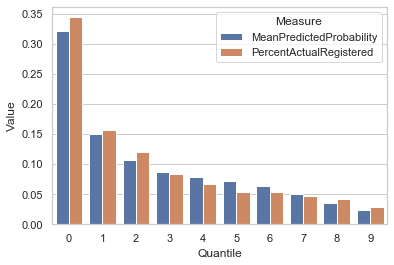

In [43]:
sb.set(style='whitegrid')
ax = sb.barplot(x='Quantile', y='Value', hue='Measure', data=melted_quantile_stats)